In [2]:
using Pkg
using DifferentialEquations, Plots

In [1]:
S = 60;
b1 = 1.5*(rand(S,1).- 1/2); # 3; 
b2 = 1; # b1/3; 
pc = 0.6; sig2 = 1;
K = 1;
al = 5;
fl = 1; # stabilize p
p_opt_vec = 1.4*ones(S,1) + 1*randn(S,1);
lam = 1e-5;

In [3]:
function Gamma_p(p,p_opt,pc,sig2)
    1 .- (1 .- exp.(-(p.-p_opt).^2 ./ 2 ./ sig2)) ./ ( 1-exp.(-pc^2 / 2 ./ sig2))
end
function dn_dt_p(n,p,al,K,p_opt_vec,pc,sig2,lam)
    al.*n.*(1 .- n/K .+ Gamma_p(p,p_opt_vec,pc,sig2)) .+ lam;
end
function dp_dt(n,p,b1,b2,al,K,p_opt_vec,pc,sig2,fl)
    al/S*sum( b1.*dn_dt_p(n,p,al,K,p_opt_vec,pc,sig2,lam).*(dn_dt_p(n,p,al,K,p_opt_vec,pc,sig2,lam).>0) ) .+ al/S*b2*sum(n) .- fl.*(p.-1);
end

function dnp_dt(du, u, pars, t)
    np = u
    du[:] = [(dn_dt_p(np[1:S, 1],np[S+1, :],al,K,p_opt_vec,pc,sig2,lam))...;
   dp_dt(np[1:S, 1],np[S+1],b1,b2,al,K,p_opt_vec,pc,sig2,fl)];
end

dnp_dt (generic function with 1 method)

In [8]:
n0 = rand(S,1); n0 = n0/sum(n0) * K/2;
np0 = [n0 ; 1];

In [9]:
tspan = (0.0, 240.0)
prob = ODEProblem(dnp_dt, np0, tspan)
sol = solve(prob, Tsit5());

In [6]:
size(sol)

(61, 1, 1406)

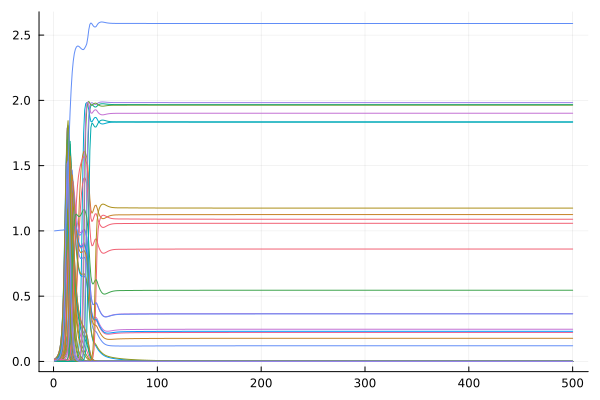

In [10]:
plot(sol[:, 1, 1:500]', leg=false)